<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">Module 1:</span> Data Wrangling</h1>
<hr>

Welcome to <span style="color:royalblue">Module 1: Data Wrangling</span>!

Often, the most interesting machine learning applications require you to **wrangle** your data first.

For this project, we've been given a **transaction-level** dataset. In other words, each observation in the raw dataset is for a single transaction - one item, one customer, one purchase.

Therefore, to get a **customer-level** data (since we want to build clusters for customers, not transactions) we need to **aggregate transactions by customer** and **engineer customer-level features**.

* This step blends together exploratory analysis, data cleaning, and feature engineering.
* Here, feature engineering comes from aggregating the transaction-level data.
* As you'll see, you still have a lot of room for creativity in this step!

<br><hr id="toc">

### In this module...

In this module, we'll cover:
1. [Transaction-level exploration](#exploration)
2. [Transaction-level cleaning](#cleaning)
3. [Customer-level feature engineering](#customer-level)
4. [Intermediary levels](#intermediary-levels)
5. [Joining together the ABT](#joining)


<br><hr>

### First, let's import libraries and load the dataset.

First, import libraries that you'll need.

In [1]:
# print_function for compatibility with Python 3
#from __future__ import print_function

# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd 


# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns


Next, let's import the dataset.
* The file path is <code style="color:crimson">'project_files/int_online_tx.csv'</code>

In [2]:
# Load international online transactions data from CSV
df = pd.read_csv('project_files/int_online_tx.csv')

Now we're ready to jump into wrangling the data!

<span id="exploration"></span>
# 1. Transaction-level exploration

Even though we eventually want customer-level data, it's still helpful to do some basic exploratory analysis at the transaction level. 

<br>
**First, display the shape of the dataset.**

In [3]:
# Dataframe dimensions
df.shape

(35116, 8)

**Next, display the first 10 observations from the dataset.**

In [4]:
# First 10 rows of data
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583.0,France
5,536370,10002,INFLATABLE POLITICAL GLOBE,48,12/1/10 8:45,0.85,12583.0,France
6,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,24,12/1/10 8:45,1.25,12583.0,France
7,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,12/1/10 8:45,2.95,12583.0,France
8,536370,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,12/1/10 8:45,2.95,12583.0,France
9,536370,22629,SPACEBOY LUNCH BOX,24,12/1/10 8:45,1.95,12583.0,France


In [5]:
df.dtypes

InvoiceNo        int64
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [7]:
df.select_dtypes(['object']).columns

Index(['StockCode', 'Description', 'InvoiceDate', 'Country'], dtype='object')

**Finally, display the distribution of transactions by country.**

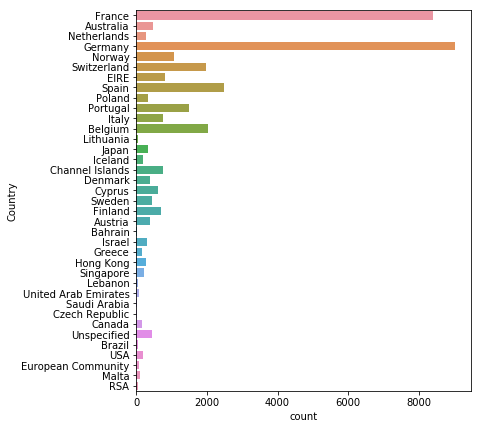

In [8]:
# Make figsize 6x7
plt.figure(figsize=(6,7))

# Bar plot by country
sns.countplot(y='Country', data=df)

<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</div>

<span id="cleaning"></span>
# 2. Transaction-level cleaning

Before we aggregate to the customer level, we need to tidy up a few things at the transaction level.

<br>
**Display the number of missing observations for each feature.**

In [75]:
# Missing data by feature
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Sales          0
dtype: int64

**Drop observations with missing customer ID's.**

In [10]:
df.CustomerID.isnull().sum()

1418

In [14]:
df.CustomerID.notnull().sum()

33698

In [11]:
df[df.CustomerID.notnull()].shape

(33698, 8)

In [12]:
# Only keep transactions with CustomerID's
df = df[df['CustomerID'].notnull()]
df.shape

(33698, 8)

In [15]:
df.CustomerID.describe()

count    33698.000000
mean     12793.819188
std        828.171434
min      12347.000000
25%      12473.000000
50%      12597.000000
75%      12708.000000
max      17844.000000
Name: CustomerID, dtype: float64

**Next, just for clarity, convert the CustomerID's from floats into integers.**
* This is technically not required, but it's good practice.
* ID's should be saved as strings or integers just so they don't get mixed up with other numeric features.
* Then, display the first 5 CustomerID's in the transaction dataset just to confirm.

In [18]:
id=df.CustomerID.astype(int)
id.dtype

dtype('int64')

In [19]:
# Convert customer ID's into integers
df['CustomerID'] = df.CustomerID.astype(int)

# Display first 5 CustomerID's in the transaction dataset
df.CustomerID.head()

0    12583
1    12583
2    12583
3    12583
4    12583
Name: CustomerID, dtype: int64

**Create a <code style="color:steelblue">'Sales'</code> interaction feature.**
* Then, display the first 5 Sales values in the transaction dataset just to confirm.

In [20]:
df.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID
count,33698.000000,33698.000000,33698.000000,33698.000000
mean,559921.120779,14.797110,4.480351,12793.819188
std,12718.848027,31.690705,47.179203,828.171434
min,536370.000000,1.000000,0.040000,12347.000000
25%,548374.500000,5.000000,1.250000,12473.000000
50%,561093.000000,10.000000,1.950000,12597.000000
75%,570672.000000,12.000000,3.750000,12708.000000
max,581587.000000,2040.000000,4161.060000,17844.000000


In [21]:
# Create 'Sales' interaction feature
df['Sales'] = df.Quantity * df.UnitPrice

# Display first 5 Sales values in the transaction dataset
df['Sales'].head()

0    90.0
1    90.0
2    45.0
3    10.2
4    15.6
Name: Sales, dtype: float64

**Before moving on, save your cleaned transaction-level data as <code style="color:crimson">cleaned_transactions.csv</code>.**
* We'll return to this in <span style="color:royalblue">Modules 2 and 3</span> to create the features for individual items.
* Remember to set <code style="color:steelblue">index=None</code> to save only the data and not the auto-generated index.

In [22]:
# Save cleaned transaction-level data
df.to_csv('cleaned_transactions.csv', index=None)

<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</div>

<span id="customer-level"></span>
# 3. Customer-level feature engineering

Now that we have a cleaned transaction-level dataset, it's time to **roll it up** to the customer level, which we'll feed into our machine learning algorithms later.

<br>
**First, we'll aggegrate invoice data by customer. We'll engineer 1 feature:**
* <code style="color:steelblue">'total_transactions'</code> - the total number of unique transactions for each customer.

In [76]:
df.InvoiceNo.groupby(df.CustomerID).agg(['min','max'])

,min,max
CustomerID,,
12347,537626,581180
12348,539318,568172
12349,577609,577609
12350,543037,543037
12352,544156,574275
12353,553900,553900
12354,550911,550911
12355,552449,552449
12356,541430,576895


In [59]:
df.InvoiceNo.groupby(df.CustomerID).agg(['count','nunique'])

,count,nunique
CustomerID,,
12347,182,7
12348,31,4
12349,73,1
12350,17,1
12352,85,8
12353,4,1
12354,58,1
12355,13,1
12356,59,3


In [61]:
tl_transactions=df.InvoiceNo.groupby(df.CustomerID).agg(['count','nunique'])
type(tl_transactions)


pandas.core.frame.DataFrame

In [66]:
tl_transactions.index

Int64Index([12347, 12348, 12349, 12350, 12352, 12353, 12354, 12355, 12356,
            12357,
            ...
            16320, 16321, 17097, 17404, 17443, 17444, 17508, 17828, 17829,
            17844],
           dtype='int64', name='CustomerID', length=414)

In [71]:
print(tl_transactions.columns)
tl_transactions.columns=['count','total_transactions']
tl_transactions.rename(columns={'count':'transaction_count'},inplace=True)
tl_transactions.head()

Index(['count', 'total_transactions'], dtype='object')


,transaction_count,total_transactions
CustomerID,,
12347,182,7
12348,31,4
12349,73,1
12350,17,1
12352,85,8


In [56]:
type(tl_transactions)

pandas.core.frame.DataFrame

In [37]:
df.InvoiceNo.groupby(df.CustomerID).count()

CustomerID
12347    182
12348     31
12349     73
12350     17
12352     85
12353      4
12354     58
12355     13
12356     59
12357    131
12358     19
12359    248
12360    129
12361     10
12362    266
12363     23
12364     85
12365     22
12367     11
12370    167
12371     63
12372     52
12373     14
12374     33
12375     17
12377     77
12378    219
12379     40
12380    104
12381     87
        ... 
13919     28
14016    161
14265     31
14277    225
14335     63
14439     32
14442     63
14566      4
14912     27
14930    128
14931     41
14932     17
14934     87
14935     10
14936    364
14937     34
15108     60
15332     35
15388     10
15480     45
16320     56
16321     12
17097    211
17404    198
17443      1
17444    135
17508     22
17828     67
17829     30
17844      5
Name: InvoiceNo, Length: 414, dtype: int64

In [106]:
# Aggegrate invoice data
invoice_data = df.InvoiceNo.groupby(df.CustomerID).agg({ 'total_transactions' : 'nunique' })

# Display invoice data for first 5 customers
invoice_data.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,total_transactions
CustomerID,
12347,7
12348,4
12349,1
12350,1
12352,8


**Next, using the same technique, aggregate product data by customer. Engineer 2 features:**
* <code style="color:steelblue">'total_products'</code> - the total number of products purchased by each customer (not the unit Quantity within each product!).
* <code style="color:steelblue">'total_unique_products'</code> - the number of unique products purchased by each customer.
* **Hint:** you'll want to use the Item ID column (i.e. StockCode) after your groupby!
* Let's name it <code style="color:crimson">product_data</code>.

In [73]:
# Aggregate product data
product_data = df.StockCode.groupby(df.CustomerID).agg({  'total_products': 'count',  'total_unique_products': 'nunique'  })

# Display product data for first 5 customers
product_data.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,total_products,total_unique_products
CustomerID,,
12347,182,103
12348,31,22
12349,73,73
12350,17,17
12352,85,59


**Finally, aggregate sales data by customer. Engineer 2 features:**
* <code style="color:steelblue">'total_sales'</code> - the total sales for each customer.
* <code style="color:steelblue">'avg_product_value'</code> - the average value of the products purchased by the customer (not the UnitPrice!).
* **Hint:** you'll want to use the Sales column after your groupby!
* Let's name it <code style="color:crimson">sales_data</code>.

In [74]:
# Roll up sales data
sales_data = df.groupby('CustomerID').Sales.agg({  'total_sales': 'sum',  'avg_product_value':'mean'  })

# Display sales data for first 5 customers
sales_data.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,total_sales,avg_product_value
CustomerID,,
12347,4310.00,23.681319
12348,1797.24,57.975484
12349,1757.55,24.076027
12350,334.40,19.670588
12352,2506.04,29.482824


In [78]:
sale1=df.Sales.groupby(df.CustomerID).agg(['sum','mean'])
sale1.rename(columns={'sum':'total_sales','mean':'avg'},inplace=True)
sale1.head()

,total_sales,avg
CustomerID,,
12347,4310.00,23.681319
12348,1797.24,57.975484
12349,1757.55,24.076027
12350,334.40,19.670588
12352,2506.04,29.482824


<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</div>

<span id="intermediary-levels"></span>
# 4. Intermediary levels

You won't always be able to easily roll up to customer-level directly... Sometimes, it will be easier to create intermediary levels first.

<br>
**Let's first aggregate cart data at the "cart-level."**
* We'll group by <code style="color:steelblue">'CustomerID'</code> AND by <code style="color:steelblue">'InvoiceID'</code>. Remember, we're treating each invoice as a "cart."
* Then, we'll calculate <code style="color:steelblue">'cart_value'</code> by taking the sum of the Sales column. This is the total sales by invoice (i.e. cart).
* Finally, we'll call <code style="color:steelblue">.reset_index()</code> to turn CustomerID and InvoiceID back into regular columns so we can perform another aggregation.

In [80]:
# Aggregate cart-level data (i.e. invoice-level)
cart_data = df.groupby(['CustomerID', 'InvoiceNo']).Sales.agg(['sum'] )
cart_data.head()

sum
CustomerID InvoiceNo        
12347      537626     711.79
           542237     475.39
           549222     636.25
           556201     382.52
           562032     584.91

In [84]:
cart_data.rename(columns={'sum':'cart_value'},inplace=True)

In [85]:
# Reset index
cart_data.reset_index(inplace=True)

# Display cart data for first 5 CARTS
cart_data.head()

,CustomerID,InvoiceNo,cart_value
0,12347,537626,711.79
1,12347,542237,475.39
2,12347,549222,636.25
3,12347,556201,382.52
4,12347,562032,584.91


**Aggregate cart data by customer. Engineer 3 features:**
* <code style="color:steelblue">'avg_cart_value'</code> - average cart value by customer.
* <code style="color:steelblue">'min_cart_value'</code> - minimum cart value by customer.
* <code style="color:steelblue">'max_cart_value'</code> - maximum cart value by customer.
* Let's name it <code style="color:crimson">agg_cart_data</code>.

In [87]:
# Aggregate cart data (at customer-level)
agg_cart_data = cart_data.groupby('CustomerID').cart_value.agg(['mean','min','max'])

agg_cart_data.rename(columns={'mean':'avg_cart_value','min':'min_cart_value','max':'max_cart_value'}, inplace=True)
# Display cart data for first 5 CUSTOMERS
agg_cart_data.head()

,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,
12347,615.714286,224.82,1294.32
12348,449.310000,227.44,892.80
12349,1757.550000,1757.55,1757.55
12350,334.400000,334.40,334.40
12352,313.255000,120.33,840.30


<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</div>

<span id="joining"></span>
# 5. Joining together the ABT

Great, now you have multiple dataframes that each contain customer-level features. 

<br>
**Let's join the various customer-level datasets together with the <code style="color:steelblue">.join()</code> function.**
* Just pick one of the customer-level dataframes and join it to a list of the others.
* By default, it will join the dataframes on their <code style="color:steelblue">index</code>... In this case, it will join by CustomerID, which is exactly what we want.
* You can read more about the <code style="color:steelblue">.join()</code> function in the <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html" target="_blank">documentation</a>.

In [89]:
# Join together customer-level ABT
customer_df = invoice_data.join([product_data, sales_data, agg_cart_data])

# Display customer-level data for first 5 customers
customer_df.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30


In [90]:
pd.concat([invoice_data, product_data,sales_data, agg_cart_data], axis=1).head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30


In [94]:
invoice_data.merge(product_data,left_index=True, right_index=True).head()

,total_transactions,total_products,total_unique_products
CustomerID,,,
12347,7,182,103
12348,4,31,22
12349,1,73,73
12350,1,17,17
12352,8,85,59


In [95]:
pd.merge(left_index=True, right_index=True, left=invoice_data, right=product_data).head()

,total_transactions,total_products,total_unique_products
CustomerID,,,
12347,7,182,103
12348,4,31,22
12349,1,73,73
12350,1,17,17
12352,8,85,59


**Finally, let's save <code style="color:crimson">customer_df</code> as our analytical base table to use later.**
* **Important:** We will not set <code style="color:steelblue">index=None</code> because we want to keep the CustomerID's as the index (this will be important when we get to Module 4).

In [69]:
# Save analytical base table
customer_df.to_csv('analytical_base_table.csv')

<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</div>

<br>
## Next Steps

Congratulations for making it through Project 4's Data Wrangling!

As a reminder, here are a few things you did in this module:
* You explored and cleaned the transaction-level dataset.
* You then rolled it up to the customer level, aggregating new features along the way.
* You also saw how intermediary groupby's can help you create otherwise tricky features.
* And you joined all of your customer-level datasets together into one analytical base table.

In the next module, <span style="color:royalblue">Module 2: Dimensionality Reduction</span>, we'll see how trying to include features for individual items can raise new challenges (i.e. The Curse of Dimensionality). We'll also introduce you to the first of 2 recommended solutions: thresholding.

<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</div>